<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Market-Capitalization-Weighted-Index" data-toc-modified-id="Market-Capitalization-Weighted-Index-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Market Capitalization Weighted Index</a></span></li><li><span><a href="#Price-Weighted-Index" data-toc-modified-id="Price-Weighted-Index-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Price Weighted Index</a></span></li><li><span><a href="#Equal-Weighted-Index" data-toc-modified-id="Equal-Weighted-Index-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Equal Weighted Index</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#Analysis-and-Comaprison-of-Crypto-Indices" data-toc-modified-id="Analysis-and-Comaprison-of-Crypto-Indices-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Analysis and Comaprison of Crypto Indices</a></span></li></ul></div>

# Financial & Crypto Index for Beginners (Part 2)

Understanding and Constructing Crypto Indexes using Python

Welcome back to our tutorial series on Cryptocurrency Analysis with Python! In the first part of this tutorial `Financial & Crypto Index for Beginners `, we have investigated their fundamental aspects, composition, weightings, and the intricacies involved in their formation. In this second part, we will focus on the process of creating crypto indices using Python, shedding light on three distinct types of indices: the Market Capitalization Weighted Index, the Price Weighted Index, and the Equal Weighted Index. Each of these indices possesses unique characteristics and offers a distinct perspective on the ever-evolving landscape of cryptocurrencies.

In the first part we have investigated the composition and weighting of crypto indices, highlighting their diversity.To illustrate the process of creating a crypto index using Python, we emphasize the importance of accumulating sufficient data. In our previous tutorial, we utilized Python to load cryptocurrency data from a CSV file into a Pandas DataFrame, transformed the data into a wide format using the Pivot function, and computed Simple Returns. Furthermore, we tackled potential data cleaning by examining and constraining the maximum and minimum returns within a reasonable range, ensuring precise analysis.

You can access the data used in this tutorial on my GitHub repository (here) 

In [57]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load cryptocurrency data from a CSV file into a DataFrame
df = pd.read_csv("TotalCryptos.csv", parse_dates=["Date"], index_col="Date")

# Pivot the DataFrame using the "Symbol" column as columns, creating a wide-format representation.
convert = df.pivot(columns="Symbol")

# Extract Market Caps and Prices from the wide-format DataFrame
mar_caps = convert["Market Caps"]
prices = convert["Prices"]

# Calculate Simple Returns using percentage change and shift the values for alignment
returns = prices.pct_change().shift(-1)

# Clip (limit) the values of the 'returns' variable to be within the range of -1 to 100
returns.clip(lower=-1, upper=100, inplace=True)
returns

Symbol,0x,1inch,aave,aavegotchi,ac-milan-fan-token,acala,adex,adventure-gold,aelf,aergo,...,wrapped-beacon-eth,wrapped-bitcoin,wrapped-nxm,yearn-finance,yield-guild-games,zcash,zcoin,zelcash,zencash,zilliqa
Date,,,,,,,,,,,,,,,,,,,,,
2013-04-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-15,0.057574,0.046146,0.025973,-0.031304,-0.000976,0.058917,0.022416,0.035554,-0.025234,0.032186,...,0.007790,0.000981,0.006412,0.027473,0.048779,0.028186,-0.006179,0.006624,0.043492,0.028831
2023-09-16,0.001033,0.005592,0.057809,0.027279,-0.001216,-0.012779,0.020629,-0.049353,-0.015148,0.002877,...,-0.005374,-0.003616,-0.017195,0.001341,0.005651,-0.002700,0.022772,0.004092,0.016583,-0.005865
2023-09-17,-0.054506,-0.035229,0.002662,-0.011493,-0.000515,-0.057498,-0.006673,-0.015955,0.130601,0.024182,...,-0.007851,-0.001744,-0.011865,-0.027285,-0.075157,-0.022550,-0.024651,-0.022871,-0.042378,-0.043659


## Market Capitalization Weighted Index

Various methodologies are used to determine how an index reflects the performance of its constituent assets. Among the most commonly used methodologies are the **Market Capitalization Index**, **Price Weighted Index**, and **Equal Weighted Index**. These methodologies play a crucial role in shaping how the index tracks and represents the assets within it.We can create a market cap weighted index (or also called value weighted index), where the index constituents are weighted based on their market capitalization. In a market cap weighted index, assets with a higher market cap have a larger influence on the index's value.

We already have the market capitalization data (`mar_caps variable`) - see above code and Part 1. To calculate  market cap weighted index, we follow these steps:

1. Calculate the total or global market capitalization over time by summing the market caps along the columns (`total_cap` variable).  


2. Now, for any coin on any given day, we can calculate its weight (called `weights`) by dividing its market cap by the total market cap.  

3. With the weights and simple returns data (calculated above and stored in the variavble `returns`), calculate the weighted average simple returns by multipling the returns by the weights and sum along the columns to obtain the simple returns of the market cap weighted index (`mcwi` variable).


So, what we end up with is a Series (`mcwi`) where each value represents the weighted sum of returns for that specific day. **This is how you calculate the returns of a market capitalization-weighted index. It reflects how an investment in such an index would have performed over time, considering the market capitalization of each constituent coin.**

With the code below we can calculate and visualize the total or global market capitalization of all cryptocurrencies over time. First we calculate the total market capitalization by summing the market capitalization values for each asset or cryptocurrency across different dates (calculate the total market capitalization for each date), resulting in a time series represented by the 'total_cap' Series

Date
2013-04-28    1.200348e+09
2013-04-29    1.282841e+09
2013-04-30    1.236877e+09
2013-05-01    1.032920e+09
2013-05-02    9.401787e+08
                  ...     
2023-09-15    8.815113e+11
2023-09-16    8.856801e+11
2023-09-17    8.838214e+11
2023-09-18    8.787095e+11
2023-09-19    6.877875e+11
Length: 3949, dtype: float64


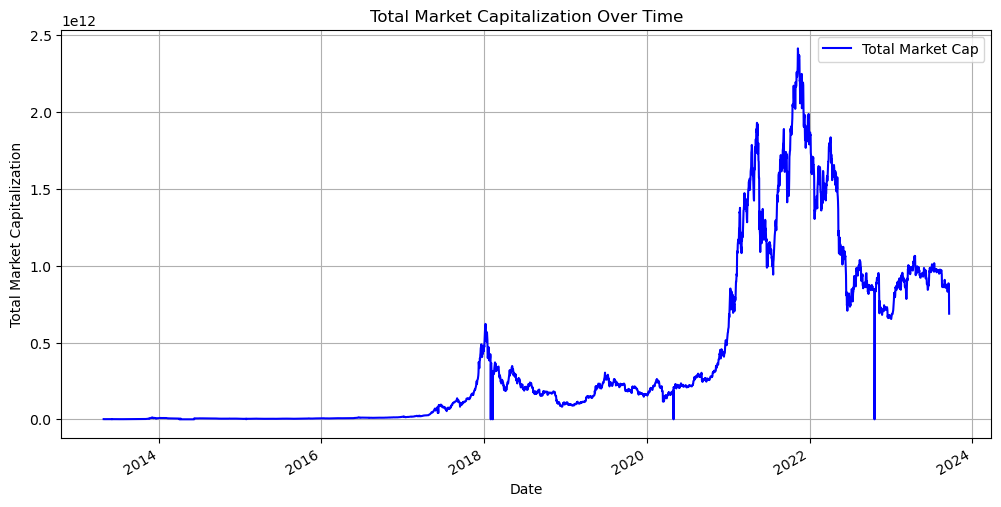

In [58]:
# Calculate the total or global market capitalization over time
total_cap = mar_caps.sum(axis ="columns")
# Print total market capitalization Series
print(total_cap)

# 'Plot the total market capitalization Series
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
total_cap.plot(label='Total Market Cap', color='b', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Total Market Capitalization')
plt.title('Total Market Capitalization Over Time')
plt.legend()
plt.grid(True)

In [59]:
# Calculate weights by dividing every coin market cap by the total market cap
weights_c = mar_caps.div(total_cap, axis="index")
weights_c

Symbol,0x,1inch,aave,aavegotchi,ac-milan-fan-token,acala,adex,adventure-gold,aelf,aergo,...,wrapped-beacon-eth,wrapped-bitcoin,wrapped-nxm,yearn-finance,yield-guild-games,zcash,zcoin,zelcash,zencash,zilliqa
Date,,,,,,,,,,,,,,,,,,,,,
2013-04-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-15,0.000018,0.000267,0.000841,0.000043,0.000012,0.000040,0.000019,0.000045,0.000180,0.000043,...,0.000125,0.004609,0.000074,0.000189,0.000039,0.000217,0.000020,0.000108,0.000105,0.000294
2023-09-16,0.000019,0.000280,0.000859,0.000041,0.000012,0.000042,0.000020,0.000046,0.000175,0.000044,...,0.000125,0.004594,0.000074,0.000193,0.000041,0.000222,0.000020,0.000108,0.000109,0.000300
2023-09-17,0.000019,0.000281,0.000910,0.000042,0.000012,0.000042,0.000020,0.000044,0.000173,0.000045,...,0.000125,0.004587,0.000073,0.000194,0.000041,0.000220,0.000020,0.000109,0.000111,0.000299


We can create a visualization of Bitcoin's weight/capitalization from April 28, 2013, to September 19, 2023. By examining this chart (and the Bitcoin Series), we can discern significant changes in Bitcoin's dominance within the portfolio. It is noteworthy that Bitcoin, which initially held nearly 100% dominance in 2013, has experienced considerable fluctuations, currently standing at approximately 70%. 

However, it's important to remember that this dataset exclusively encompasses coins available on Binance, omitting others. Consequently, this figure is slightly overstate Bitcoin's true dominance within the broader cryptocurrency market.

Date
2013-04-28    0.953362
2013-04-29    0.954595
2013-04-30    0.953964
2013-05-01    0.952613
2013-05-02    0.951987
                ...   
2023-09-15    0.551120
2023-09-16    0.549030
2023-09-17    0.548620
2023-09-18    0.551150
2023-09-19    0.708886
Name: bitcoin, Length: 3949, dtype: float64


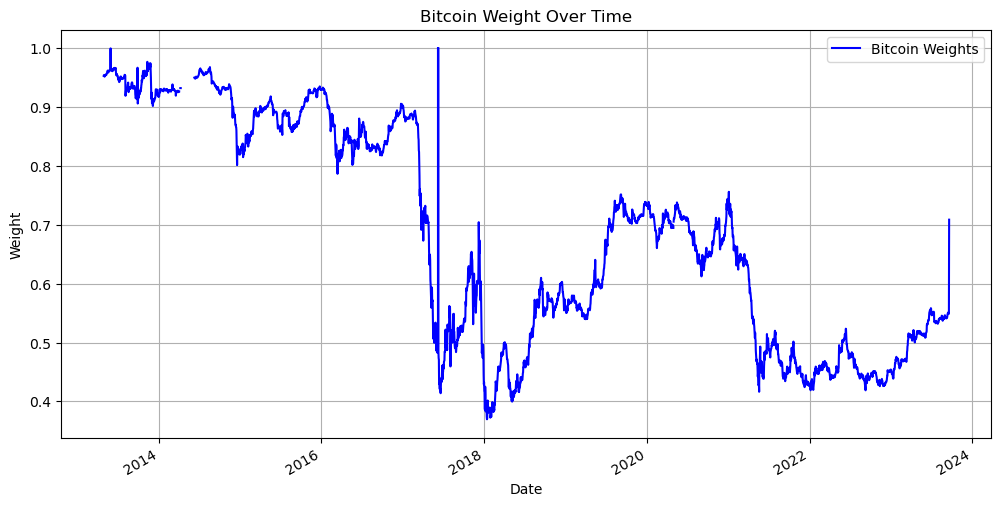

In [60]:
# Print Bitcoin Weights/Capitalization Series
print(weights_c["bitcoin"])
# Plot Bitcoin Weights
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
weights_c["bitcoin"].plot(label='Bitcoin Weights', color='b', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Weight')
plt.title('Bitcoin Weight Over Time')
plt.legend()
plt.grid(True)

In [62]:
# Sanity check: check that the sum of weights for any given day is equal to 1 (or 100%)
weights_c.sum(axis="columns")

Date
2013-04-28    1.0
2013-04-29    1.0
2013-04-30    1.0
2013-05-01    1.0
2013-05-02    1.0
             ... 
2023-09-15    1.0
2023-09-16    1.0
2023-09-17    1.0
2023-09-18    1.0
2023-09-19    1.0
Length: 3949, dtype: float64

The code below computes the market cap weighted index that reflects the performance of a portfolio, with each asset's influence weighted by its market capitalization.

In [64]:
# Calculate the market cap weighted index 
mcwi = returns.mul(weights_c).sum(axis="columns")
mcwi

Date
2013-04-28    0.068210
2013-04-29   -0.036229
2013-04-30   -0.165214
2013-05-01   -0.090141
2013-05-02   -0.069847
                ...   
2023-09-15    0.004666
2023-09-16   -0.002260
2023-09-17   -0.005398
2023-09-18    0.005197
2023-09-19    0.000000
Length: 3949, dtype: float64

## Price Weighted Index

For creating the price weighted index (`pwi`) we follow a similar process to the market cap weighted index, with one key difference: **weights are determined by prices, not market caps. Here's how it works**:

- To calculate price-weighted average simple returns, we need the prices of each coin (calculated previously). Next, we calculate the sum of these prices across all coins for each day.

- To determine the weights for each coin on each day, we divide the individual coin prices by the total sum of prices for that day. This gives us the proportion of the total index value represented by each coin.


- Finally, we calculate the simple returns of the price weighted index (`pwi`) by finding the price-weighted average of returns. This involves multiplying the returns by the respective weights for each coin on each day and then summing these weighted returns. The result is a time series of simple returns for the price weighted index.


In [65]:
# Calculate the total or global price over time
total_pric = prices.sum(axis ="columns")
total_pric

Date
2013-04-28      106.449061
2013-04-29      113.762997
2013-04-30      109.619128
2013-05-01       91.466117
2013-05-02       83.204296
                  ...     
2023-09-15    64263.661602
2023-09-16    64637.368847
2023-09-17    64449.867460
2023-09-18    64151.622735
2023-09-19    62815.781596
Length: 3949, dtype: float64

In [66]:
# Determine the weights for each coin on each day
weights_p = prices.div(total_pric, axis="index")
weights_p

Symbol,0x,1inch,aave,aavegotchi,ac-milan-fan-token,acala,adex,adventure-gold,aelf,aergo,...,wrapped-beacon-eth,wrapped-bitcoin,wrapped-nxm,yearn-finance,yield-guild-games,zcash,zcoin,zelcash,zencash,zilliqa
Date,,,,,,,,,,,,,,,,,,,,,
2013-04-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-15,0.000003,0.000004,0.000794,0.000011,0.000027,6.844907e-07,0.000002,0.000008,0.000005,0.000001,...,0.024156,0.388386,0.000433,0.078347,0.000003,0.000370,0.000021,0.000005,0.000102,2.366618e-07
2023-09-16,0.000003,0.000004,0.000810,0.000011,0.000027,7.206281e-07,0.000002,0.000008,0.000005,0.000001,...,0.024203,0.386519,0.000433,0.080034,0.000003,0.000379,0.000021,0.000005,0.000106,2.420773e-07
2023-09-17,0.000003,0.000004,0.000859,0.000011,0.000027,7.134886e-07,0.000002,0.000008,0.000005,0.000001,...,0.024143,0.386242,0.000427,0.080374,0.000003,0.000379,0.000022,0.000005,0.000108,2.413577e-07


In [67]:
# Sanity check: check these weights to ensure they sum up to one (or 100%) for each row
weights_p.sum(axis="columns")

Date
2013-04-28    1.0
2013-04-29    1.0
2013-04-30    1.0
2013-05-01    1.0
2013-05-02    1.0
             ... 
2023-09-15    1.0
2023-09-16    1.0
2023-09-17    1.0
2023-09-18    1.0
2023-09-19    1.0
Length: 3949, dtype: float64

Date
2013-04-28    0.969348
2013-04-29    0.970214
2013-04-30    0.969838
2013-05-01    0.968983
2013-05-02    0.968607
                ...   
2023-09-15    0.388181
2023-09-16    0.386167
2023-09-17    0.386173
2023-09-18    0.387553
2023-09-19    0.398130
Name: bitcoin, Length: 3949, dtype: float64


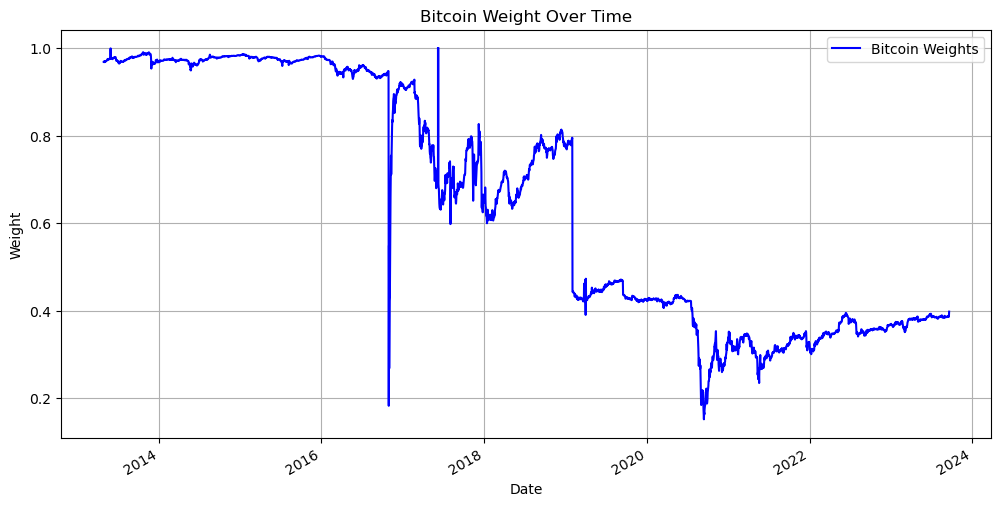

In [68]:
# Print Bitcoin Weights  Series
print(weights_p["bitcoin"])
# Plot Bitcoin Weights
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
weights_p["bitcoin"].plot(label='Bitcoin Weights', color='b', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Weight')
plt.title('Bitcoin Weight Over Time')
plt.legend()
plt.grid(True)

In [11]:
# Calculate the price weighted index 
pwi = returns.mul(weights_p).sum(axis="columns")
pwi

Date
2013-04-28    0.068708
2013-04-29   -0.036425
2013-04-30   -0.165601
2013-05-01   -0.090327
2013-05-02   -0.069012
                ...   
2023-09-15    0.005815
2023-09-16   -0.002901
2023-09-17   -0.004628
2023-09-18    0.006178
2023-09-19    0.000000
Length: 3949, dtype: float64

## Equal Weighted Index

For creating the equal weighted index (`ewi`) we are going to use sing the previously calculated simple returns:

- First, we need to determine the number of active coins on any given day. To do this, we combine the notna and sum functions (This provides us with the count of active coins on each day). For example, on April 28, 2013, there were 2 active coins, and almost ten years later, there are 352.

- With the count of active coins, we can calculate the equal weights. These weights are simply obtained by dividing 1 by the number of active coins. 


- Finally, we calculate the simple returns of the equally weighted index. This involves multiplying the simple returns by their corresponding equal weights and then summing these weighted returns. The result is a time series of simple returns for the equally weighted index.


In [12]:
# Determine the number of active coins on any given day
returns.notna().sum(axis="columns")

Date
2013-04-28      2
2013-04-29      2
2013-04-30      2
2013-05-01      2
2013-05-02      2
             ... 
2023-09-15    352
2023-09-16    352
2023-09-17    352
2023-09-18    352
2023-09-19      0
Length: 3949, dtype: int64

In [13]:
weights_e = 1/returns.notna().sum(axis="columns")
weights_e

Date
2013-04-28    0.500000
2013-04-29    0.500000
2013-04-30    0.500000
2013-05-01    0.500000
2013-05-02    0.500000
                ...   
2023-09-15    0.002841
2023-09-16    0.002841
2023-09-17    0.002841
2023-09-18    0.002841
2023-09-19         inf
Length: 3949, dtype: float64

In [14]:
# Calculate the price weighted index 
ewi = returns.mul(weights_e, axis="index").sum(axis="columns")
ewi

Date
2013-04-28    0.054084
2013-04-29   -0.030524
2013-04-30   -0.154140
2013-05-01   -0.084998
2013-05-02   -0.092544
                ...   
2023-09-15    0.024933
2023-09-16    0.010400
2023-09-17   -0.029038
2023-09-18    0.012065
2023-09-19    0.000000
Length: 3949, dtype: float64

## Conclusion

In this second part of our tutorial, `Financial & Crypto Index for Beginners`, we have equipped ourselves with the knowledge and practical skills needed to create and analyze three distinct types of crypto indices: Market Capitalization Weighted Index, Price Weighted Index, and Equal Weighted Index. In the third and final part (Part 3), we will analyze and compare the performance of these three Crypto Indices. Stay tuned!
